In [1]:
'''
Machine learning methods

Author: Saeed Yousefi

Last edit on 6/11/2022
'''

'\nMachine learning methods\n\nAuthor: Saeed Yousefi\n\nLast edit on 6/11/2022\n'

In [2]:
# Create folder for saving the outputs
!mkdir files_ML

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import codecs
import math
import random
import csv
from keras.callbacks import EarlyStopping
from time import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.utils import check_random_state
import xgboost as xgb
from math import sqrt
import random
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from keras.utils.vis_utils import plot_model
from statsmodels.tsa.stattools import adfuller, kpss, ccf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
np.random.seed(12345)
check_random_state(12345)

RandomState(MT19937) at 0x7F00F2738160

# **Data Preprocessing**

In [5]:
df = pd.read_csv('solar_a.csv')
df = df.iloc[1:, :]
df.head()

,Date,Hour,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy
1,2/1/2016,1,0.0,7.88,1.16,0.62,91.04,7.04,29.11,29.90,0.0
2,2/1/2016,2,0.0,9.84,1.22,0.96,89.28,8.96,29.12,29.91,0.0
3,2/1/2016,3,0.0,9.84,1.02,0.61,89.12,6.36,29.14,29.93,0.0
4,2/1/2016,4,0.0,9.88,0.83,0.45,90.08,6.12,29.15,29.94,0.0
5,2/1/2016,5,0.0,9.84,0.77,0.10,85.44,5.08,29.16,29.95,0.0


In [6]:
df['Time'] = pd.to_datetime(df['Date'])
df = df.drop(['Date'], axis=1)
df = df.set_index('Time')

In [7]:
for i in range(len(df)):
    position = df.index[i]
    #hour = position.hour
    day = position.day
    month = position.month
    df.loc[position, 'Month'] = month
    df.loc[position, 'Day'] = day

In [8]:
df = df.reset_index('Time')

In [9]:
df.head()

,Time,Hour,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy,Month,Day
0,2016-02-01,1,0.0,7.88,1.16,0.62,91.04,7.04,29.11,29.90,0.0,2.0,1.0
1,2016-02-01,2,0.0,9.84,1.22,0.96,89.28,8.96,29.12,29.91,0.0,2.0,1.0
2,2016-02-01,3,0.0,9.84,1.02,0.61,89.12,6.36,29.14,29.93,0.0,2.0,1.0
3,2016-02-01,4,0.0,9.88,0.83,0.45,90.08,6.12,29.15,29.94,0.0,2.0,1.0
4,2016-02-01,5,0.0,9.84,0.77,0.10,85.44,5.08,29.16,29.95,0.0,2.0,1.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15071 entries, 0 to 15070
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Time               15071 non-null  datetime64[ns]
 1   Hour               15071 non-null  int64         
 2   Cloud coverage     15071 non-null  float64       
 3   Visibility         15071 non-null  float64       
 4   Temperature        15071 non-null  float64       
 5   Dew point          15071 non-null  float64       
 6   Relative humidity  15071 non-null  float64       
 7   Wind speed         15071 non-null  float64       
 8   Station pressure   15071 non-null  float64       
 9   Altimeter          15071 non-null  float64       
 10  Solar energy       15071 non-null  float64       
 11  Month              15071 non-null  float64       
 12  Day                15071 non-null  float64       
dtypes: datetime64[ns](1), float64(11), int64(1)
memory usage: 1.5

In [11]:
df.describe()

,Hour,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy,Month,Day
count,15071.000000,15071.000000,15071.000000,15071.000000,15071.000000,15071.000000,15071.000000,15071.000000,15071.000000,15071.000000,15071.000000,15071.000000
mean,12.499237,0.381301,9.157013,14.379589,9.765052,72.256059,8.623564,28.582040,30.020555,910.516398,6.221087,15.557030
std,6.922012,0.424024,2.051194,10.146515,9.541180,20.033345,5.544832,3.520825,0.216525,1375.141240,3.062102,8.769324
min,1.000000,0.000000,0.000000,-19.230000,-20.780000,14.880000,0.000000,7.670000,21.880000,0.000000,1.000000,1.000000
25%,6.500000,0.000000,9.960000,6.960000,3.080000,59.880000,5.040000,29.100000,29.910000,0.000000,4.000000,8.000000
50%,12.000000,0.140000,10.000000,15.840000,11.000000,76.700000,7.720000,29.220000,30.030000,35.510000,6.000000,15.000000
75%,18.000000,0.910000,10.000000,22.320000,17.410000,88.635000,11.760000,29.330000,30.130000,1467.375000,9.000000,23.000000
max,24.000000,1.000000,10.000000,34.010000,27.310000,100.000000,41.560000,29.970000,30.780000,4733.250000,12.000000,31.000000


In [12]:
# Find NaNs and duplicates in df

print('There are {} missing values or NaNs in df.'
      .format(df.isnull().values.sum()))

temp_weather = df.duplicated(keep='first').sum()

print('There are {} duplicate rows in df based on all columns.'
      .format(temp_weather))

There are 0 missing values or NaNs in df.
There are 0 duplicate rows in df based on all columns.


In [13]:
# Define a function to plot different types of time-series

def plot_series(df=None, column=None, series=pd.Series([]), 
                label=None, ylabel=None, title=None, start=0, end=None):
    sns.set()
    fig, ax = plt.subplots(figsize=(30, 12))
    ax.set_xlabel('Hour', fontsize=16)
    if column:
        ax.plot(df[column][start:end], label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if series.any():
        ax.plot(series, label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if label:
        ax.legend(fontsize=16)
    if title:
        ax.set_title(title, fontsize=24)
    ax.grid(True)
    return ax

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


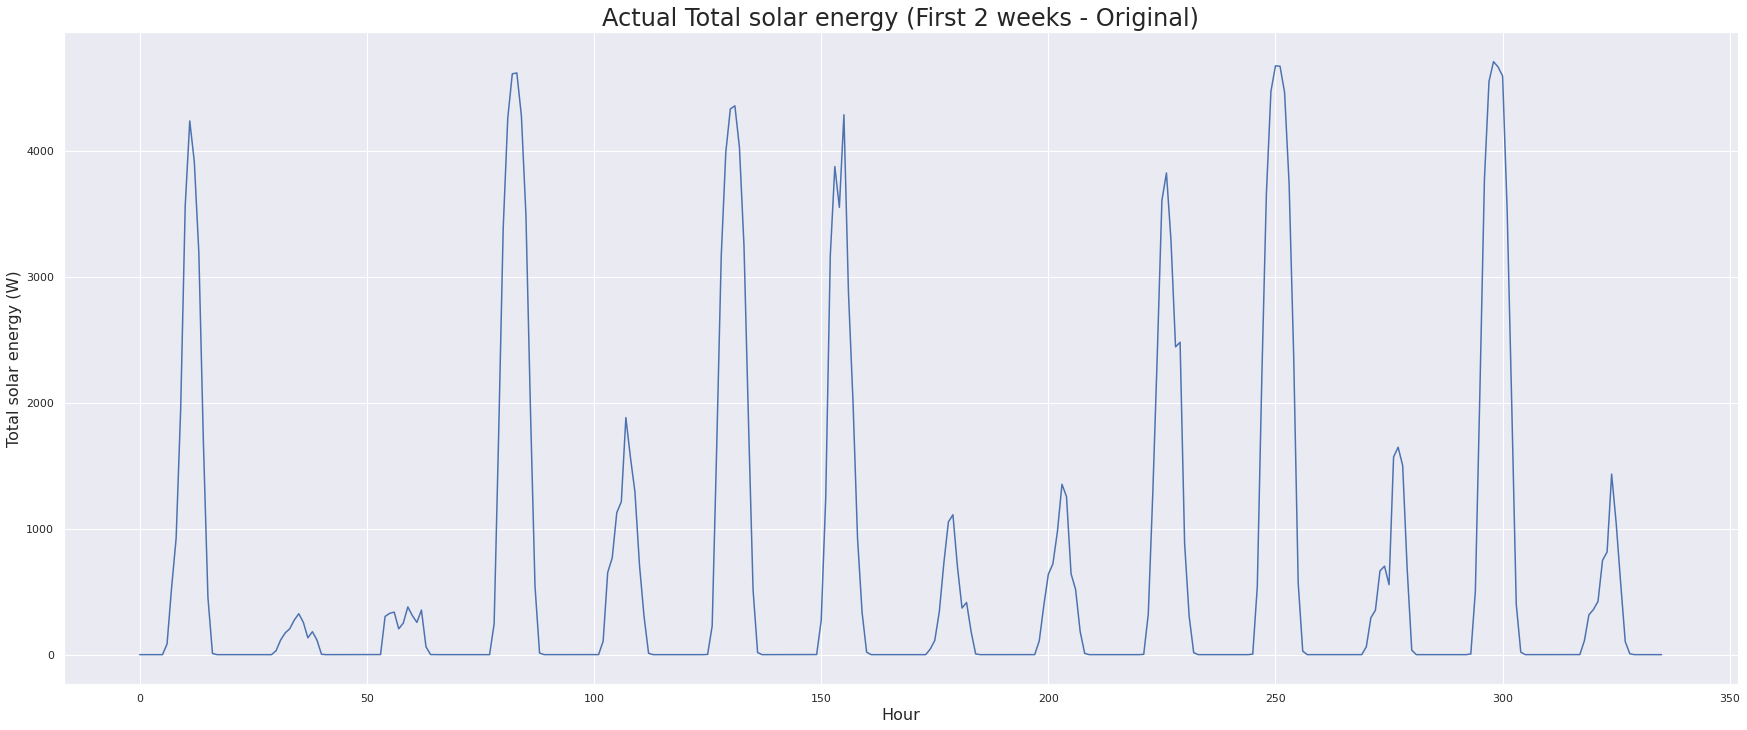

In [14]:
# Zoom into the plot of the hourly (actual) total solar energy

ax = plot_series(df=df, column='Solar energy', ylabel='Total solar energy (W)',
                 title='Actual Total solar energy (First 2 weeks - Original)', end=24*7*2)
plt.savefig('/content/files_ML/1.png')
plt.show()

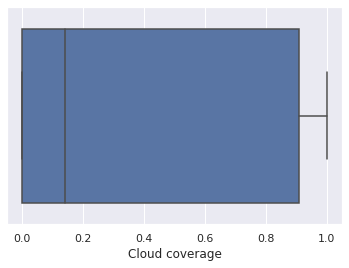

In [15]:
# Check for outliers in 'Cloud coverage' column

sns.boxplot(x=df['Cloud coverage'])
plt.savefig('/content/files_ML/2.png')
plt.show()

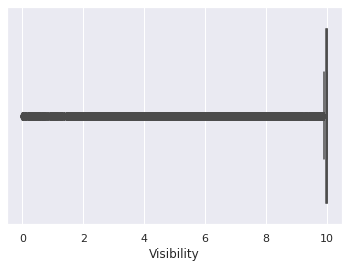

In [16]:
# Check for outliers in 'Visibility' column

sns.boxplot(x=df['Visibility'])
plt.savefig('/content/files_ML/3.png')
plt.show()

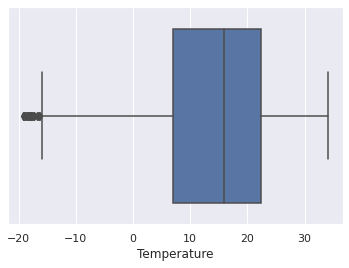

In [17]:
# Check for outliers in 'Temperature' column

sns.boxplot(x=df['Temperature'])
plt.savefig('/content/files_ML/4.png')
plt.show()

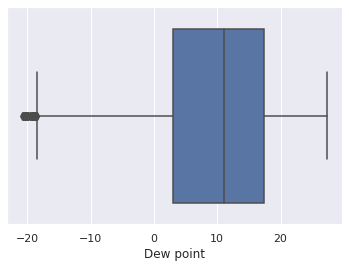

In [18]:
# Check for outliers in 'Dew point' column

sns.boxplot(x=df['Dew point'])
plt.savefig('/content/files_ML/5.png')
plt.show()

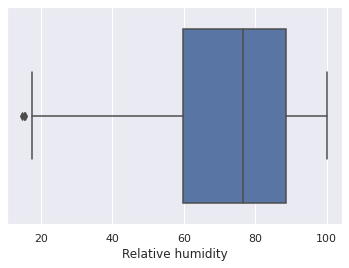

In [19]:
# Check for outliers in 'Relative humidity' column

sns.boxplot(x=df['Relative humidity'])
plt.savefig('/content/files_ML/6.png')
plt.show()

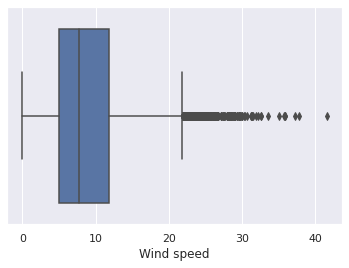

In [20]:
# Check for outliers in 'Wind speed' column

sns.boxplot(x=df['Wind speed'])
plt.savefig('/content/files_ML/7.png')
plt.show()

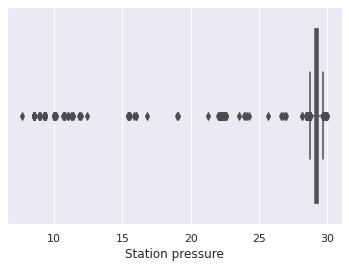

In [21]:
# Check for outliers in 'Station pressure' column

sns.boxplot(x=df['Station pressure'])
plt.savefig('/content/files_ML/8.png')
plt.show()

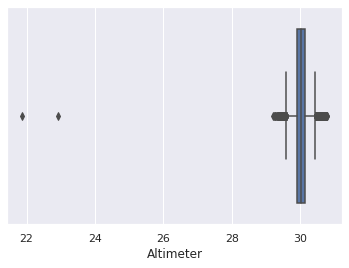

In [22]:
# Check for outliers in 'Altimeter' column

sns.boxplot(x=df['Altimeter'])
plt.savefig('/content/files_ML/9.png')
plt.show()

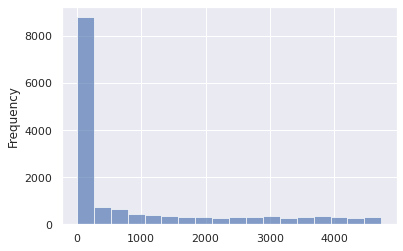

In [23]:
# Plot the histogram of the actual solar energy

ax = df['Solar energy'].plot.hist(bins=18, alpha=0.65)

In [24]:
y = df['Solar energy']
adf_test = adfuller(y, regression='c')
print('ADF Statistic: {:.6f}\np-value: {:.6f}\n#Lags used: {}'
      .format(adf_test[0], adf_test[1], adf_test[2]))
for key, value in adf_test[4].items():
    print('Critical Value ({}): {:.6f}'.format(key, value))

ADF Statistic: -11.383537
p-value: 0.000000
#Lags used: 43
Critical Value (1%): -3.430785
Critical Value (5%): -2.861732
Critical Value (10%): -2.566872


In [25]:
kpss_test = kpss(y, regression='c', lags='auto')
print('KPSS Statistic: {:.6f}\np-value: {:.6f}\n#Lags used: {}'
      .format(kpss_test[0], kpss_test[1], kpss_test[2]))
for key, value in kpss_test[3].items():
    print('Critical Value ({}): {:.6f}'.format(key, value))

KPSS Statistic: 1.409892
p-value: 0.010000
#Lags used: 27
Critical Value (10%): 0.347000
Critical Value (5%): 0.463000
Critical Value (2.5%): 0.574000
Critical Value (1%): 0.739000


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


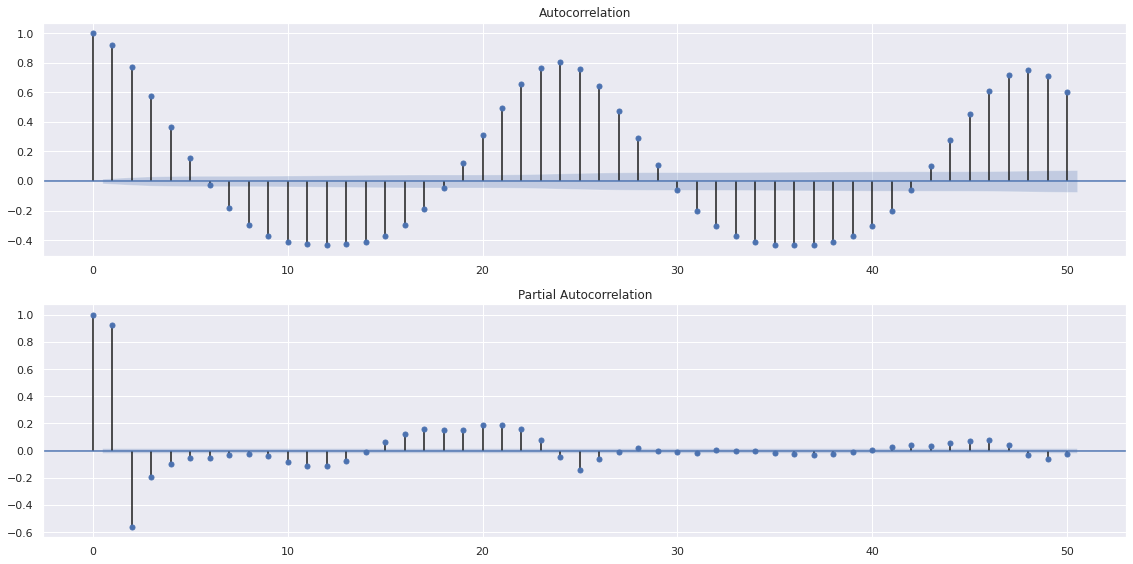

In [26]:
# Plot autocorrelation and partial autocorrelation plots

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 8))
plot_acf(df['Solar energy'], lags=50, ax=ax1)
plot_pacf(df['Solar energy'], lags=50, ax=ax2)
plt.tight_layout()
plt.savefig('/content/files_ML/10.png')
plt.show()

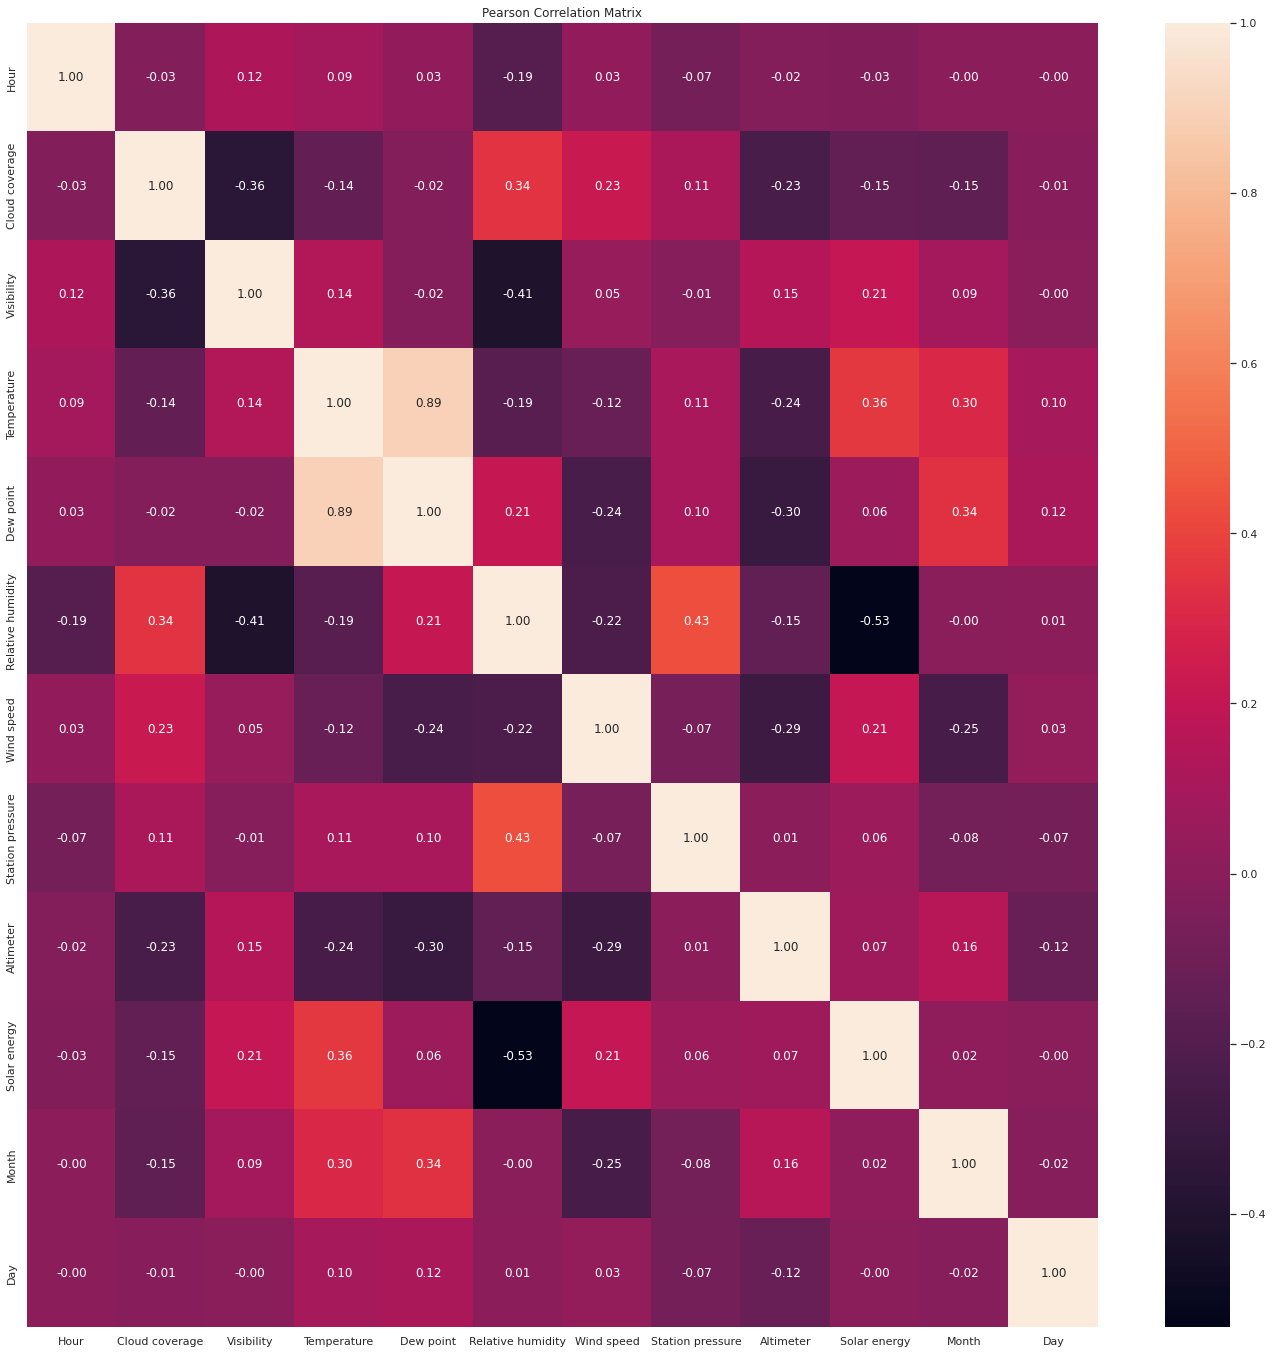

In [27]:
# Plot Pearson correlation matrix

correlations = df.corr(method='pearson')
fig = plt.figure(figsize=(24, 24))
sns.heatmap(correlations, annot=True, fmt='.2f')
plt.title('Pearson Correlation Matrix')
plt.savefig('/content/files_ML/11.png')
plt.show()

In [28]:
# Find the correlations between the solar energy and the rest of the features

correlations = df.corr(method='pearson')
print(correlations['Solar energy'].sort_values(ascending=False).to_string())

Solar energy         1.000000
Temperature          0.360272
Visibility           0.206589
Wind speed           0.206295
Altimeter            0.074079
Dew point            0.064089
Station pressure     0.060989
Month                0.017867
Day                 -0.003584
Hour                -0.030865
Cloud coverage      -0.147967
Relative humidity   -0.533341


# **2. Train, Test and Validation**

In [29]:
df = df.iloc[: , 1:]
df.head()

,Hour,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy,Month,Day
0,1,0.0,7.88,1.16,0.62,91.04,7.04,29.11,29.90,0.0,2.0,1.0
1,2,0.0,9.84,1.22,0.96,89.28,8.96,29.12,29.91,0.0,2.0,1.0
2,3,0.0,9.84,1.02,0.61,89.12,6.36,29.14,29.93,0.0,2.0,1.0
3,4,0.0,9.88,0.83,0.45,90.08,6.12,29.15,29.94,0.0,2.0,1.0
4,5,0.0,9.84,0.77,0.10,85.44,5.08,29.16,29.95,0.0,2.0,1.0


In [30]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
norm_df = pd.DataFrame(min_max_scaler.fit_transform(df), 
                             columns=df.columns, 
                             index=df.index)
norm_df.head()

,Hour,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy,Month,Day
0,0.000000,0.0,0.788,0.382983,0.444999,0.894737,0.169394,0.961435,0.901124,0.0,0.090909,0.0
1,0.043478,0.0,0.984,0.384110,0.452069,0.874060,0.215592,0.961883,0.902247,0.0,0.090909,0.0
2,0.086957,0.0,0.984,0.380353,0.444791,0.872180,0.153032,0.962780,0.904494,0.0,0.090909,0.0
3,0.130435,0.0,0.988,0.376784,0.441464,0.883459,0.147257,0.963229,0.905618,0.0,0.090909,0.0
4,0.173913,0.0,0.984,0.375657,0.434186,0.828947,0.122233,0.963677,0.906742,0.0,0.090909,0.0


In [31]:
features1 = ['Hour', 'Cloud coverage', 'Visibility', 'Temperature', 'Dew point',
       'Relative humidity', 'Wind speed', 'Station pressure', 'Altimeter',
        'Month', 'Day']

features2 = ['Hour', 'Cloud coverage', 'Visibility', 'Temperature', 'Dew point',
       'Relative humidity', 'Wind speed', 'Station pressure', 'Altimeter']

target = ['Solar energy']

In [32]:
#norm_df = np.array(norm_df)

X_s1 = norm_df[features1]
X_s2 = norm_df[features2]

y_s1 = norm_df[target]

In [33]:
l = len(norm_df)
train_end_idx = int(0.6*l)

X_train1 = X_s1.iloc[:train_end_idx, :]
X_train2 = X_s2.iloc[:train_end_idx, :]

y_train1 = y_s1.iloc[:train_end_idx, ]
y_train2 = y_s1.iloc[:train_end_idx, ]

X_test1 = X_s1.iloc[train_end_idx: , :]
X_test2 = X_s2.iloc[train_end_idx: , :]

y_test1 = y_s1.iloc[train_end_idx: , ]
y_test2 = y_s1.iloc[train_end_idx: , ]

In [34]:
X = df[df.columns.drop('Solar energy')].values
y = df['Solar energy'].values
y = y.reshape(-1, 1)

In [35]:
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

In [36]:
scaler_X.fit(X[:train_end_idx])
scaler_y.fit(y[:train_end_idx])

MinMaxScaler()

In [37]:
X_norm1 = scaler_X.transform(X)
y_norm = scaler_y.transform(y)

In [38]:
pca = PCA()
X_pca = pca.fit(X_norm1[:train_end_idx])

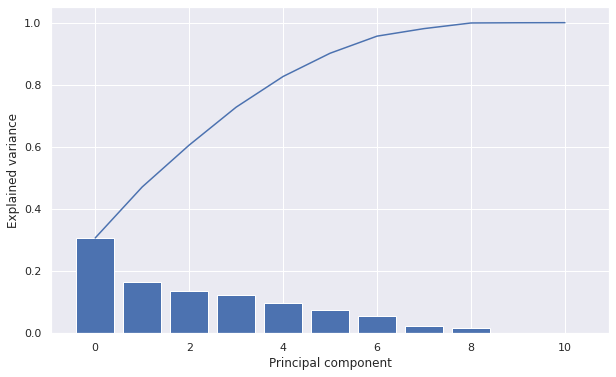

In [39]:
num_components = len(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.bar(np.arange(num_components), pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal component')
plt.ylabel('Explained variance')
plt.savefig('/content/files_ML/PCA.png')
plt.show()

In [40]:
pca = PCA(n_components=0.90)
pca.fit(X_norm1[:train_end_idx])
X_pca = pca.transform(X_norm1)

In [41]:
X_pca.shape

(15071, 6)

In [42]:
X_train3 = X_pca[:train_end_idx, :]
y_train3 = y_norm[:train_end_idx, ]

X_test3 = X_pca[train_end_idx:, :]
y_test3 = y_norm[train_end_idx:, ]

# **SENARIO 1**

In [43]:
pd.options.display.float_format = '{:.4f}'.format
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
%matplotlib inline

import IPython.core.display as di

In [44]:
# Initialize and fit the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# R^2 (coefficient of determination) regression score function
# Mean squared error regression loss

benchmark_model1 = LinearRegression() #object of class LinearRegression

start = time()
benchmark_model1.fit(X_train1, y_train1) #Fit object to training set
end = time()
y_pred1=benchmark_model1.predict(X_test1)
print("Classifier fitted in {:.4f} seconds".format(end-start))
print("Score on Training data : {:.4f}%".format(benchmark_model1.score(X_train1, y_train1) * 100))
print("Score on Testing data : {:.4f}%".format(benchmark_model1.score(X_test1, y_test1) * 100))

y_test1_np = np.array(y_test1)
print("RMSE : {:.4f}".format(np.sqrt(np.mean((y_test1_np - y_pred1)**2))))
mae = mean_absolute_error(y_test1, y_pred1)
print('MAE: %4f' % mae)

Classifier fitted in 0.0196 seconds
Score on Training data : 49.5469%
Score on Testing data : 48.3307%
RMSE : 0.2161
MAE: 0.164987


In [45]:
# Function to fit the regressor and record performance metrics
def pipeline(reg, X_train, y_train, X_test, y_test, **kwargs):
    
    # Dictionary to hold properties of Models
    reg_props = {}
    
    # Initialize and fit the regressor, and time taken
    regressor = reg(**kwargs)
    start = time()
    regressor.fit(X_train, y_train)
    end = time()
    
    # Store the metrics for the regressor
    reg_props["name"] = reg.__name__
    reg_props["train_time"] = end - start
    reg_props["train_score"] = regressor.score(X_train, y_train)
    reg_props["test_score"] = regressor.score(X_test, y_test)
    reg_props["rmse"] = np.sqrt(mean_squared_error(y_test, regressor.predict(X_test)))
    reg_props["MAE"] = mean_absolute_error(y_test, regressor.predict(X_test))
    
    return reg_props

In [46]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
# Function to execute each algorithm through the pipeline
def execute_pipeline():
    # Create the list of algorithms
    regressors = [
        Ridge,
        KNeighborsRegressor,
        RandomForestRegressor,
        GradientBoostingRegressor,
        MLPRegressor,
        ExtraTreesRegressor,
        SVR
            ]
    
    # To store the properties for each regressor
    props = []
    
    """
    Iterate thorugh the list of regressors,
    passing each thorugh the pipeline and
    storing its properites
    """ 
    for reg in regressors:
        properites = pipeline(reg, X_train1, y_train1, X_test1, y_test1)
        props.append(properites)
        
    return props

In [47]:
def get_properties():
    # Obtain the properties after executing the pipeline
    properties = execute_pipeline()
    
    # Extract each individual property of the Regressors
    names = [prop["name"] for prop in properties]
    train_times = [prop["train_time"] for prop in properties]
    train_scores = [prop["train_score"] for prop in properties]
    test_scores = [prop["test_score"] for prop in properties]
    rmse_vals = [prop["rmse"] for prop in properties]
    mae_vals = [prop["MAE"] for prop in properties]
        
    # Create a DataFrame from these properties
    df = pd.DataFrame(index=names, 
                    data = {
                            "Training Times": train_times,
                            "Training Scores": train_scores,
                            "Testing Scores": test_scores,
                            "RMSE": rmse_vals,
                            "MAE":mae_vals,
                      }
                  )
    
    return df

# Obain the properties in a structured DataFrame after executing the pipeline
properties1 = get_properties()

In [48]:
# Append the peoperties of Linear Rgression Benchmark model to the DataFrame
# Storing the properties of Selected models

properties1 = pd.concat(
    [properties1,
    pd.Series(
    {
        "Name": "Linear Regression",
        "RMSE": np.sqrt(mean_squared_error(y_test1, benchmark_model1.predict(X_test1))),
        "MAE": mean_absolute_error(y_test1, benchmark_model1.predict(X_test1)),
        #"MAPE": MAPError(y_test, benchmark_model.predict(X_test)),
        "Training Scores": benchmark_model1.score(X_train1, y_train1),
        "Testing Scores" :benchmark_model1.score(X_test1, y_test1),
        "Training Times": end - start
        
    }
    ).to_frame().T.set_index(["Name"])]
)

properties1

,Training Times,Training Scores,Testing Scores,RMSE,MAE
Ridge,0.0070,0.4929,0.4835,0.2161,0.1660
KNeighborsRegressor,0.0217,0.9141,0.6887,0.1678,0.0948
RandomForestRegressor,4.5796,0.9882,0.7993,0.1347,0.0659
GradientBoostingRegressor,1.8501,0.8878,0.7917,0.1372,0.0753
MLPRegressor,3.5683,0.8713,0.7986,0.1349,0.0793
ExtraTreesRegressor,1.9096,1.0000,0.8065,0.1323,0.0648
SVR,2.2027,0.7998,0.7096,0.1620,0.1120
Linear Regression,0.0196,0.4955,0.4833,0.2161,0.1650


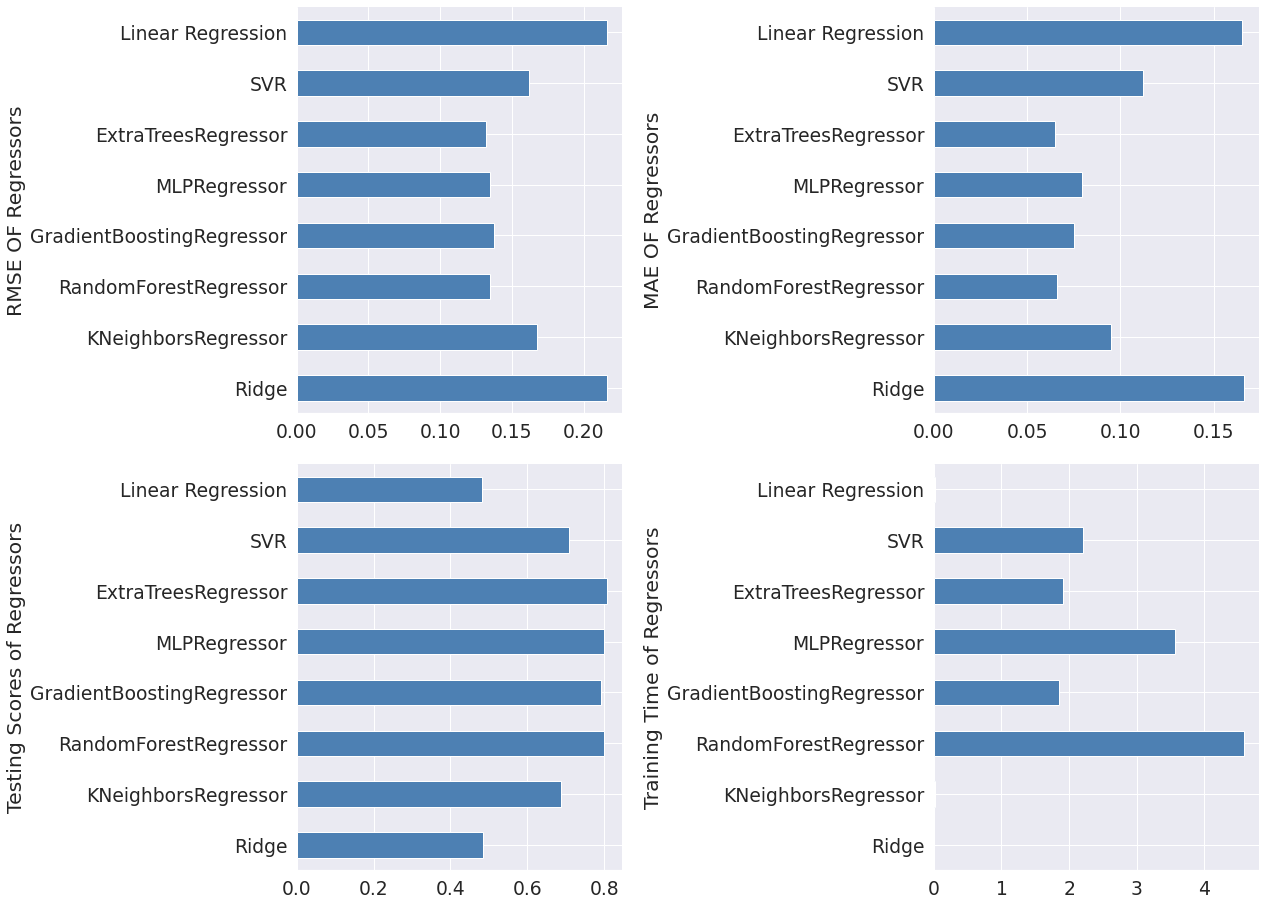

In [49]:
# Plot to compare thePerformance of Algorithms
sns.set_context("notebook", font_scale=1.7)
plt.figure(figsize=(18,13))

plt.subplot(2,2,1)
plt.ylabel("RMSE OF Regressors")
properties1["RMSE"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()


plt.subplot(2,2,2)
plt.ylabel("MAE OF Regressors")
properties1["MAE"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()

plt.subplot(2,2,3)
plt.ylabel("Testing Scores of Regressors")
properties1["Testing Scores"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()

plt.subplot(2,2,4)
plt.ylabel("Training Time of Regressors")
properties1["Training Times"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()

plt.savefig('/content/files_ML/S1.png')
plt.show()

# **SENARIO 2**

In [50]:
benchmark_model2 = LinearRegression() #object of class LinearRegression

start = time()
benchmark_model2.fit(X_train2, y_train2) #Fit object to training set
end = time()
y_pred2=benchmark_model2.predict(X_test2)
print("Classifier fitted in {:.2f} seconds".format(end-start))
print("Score on Training data : {:.2f}%".format(benchmark_model2.score(X_train2, y_train2) * 100))
print("Score on Testing data : {:.2f}%".format(benchmark_model2.score(X_test2, y_test2) * 100))

y_test2_np = np.array(y_test2)
print("RMSE : {:.3f}".format(np.sqrt(np.mean((y_test2_np - y_pred2)**2))))
mae = mean_absolute_error(y_test2, y_pred2)
print('MAE: %f' % mae)

Classifier fitted in 0.01 seconds
Score on Training data : 49.49%
Score on Testing data : 48.48%
RMSE : 0.216
MAE: 0.164617


In [51]:
# Function to execute each algorithm through the pipeline
def execute_pipeline():
    # Create the list of algorithms
    regressors = [
        Ridge,
        KNeighborsRegressor,
        RandomForestRegressor,
        GradientBoostingRegressor,
        MLPRegressor,
        ExtraTreesRegressor,
        SVR
            ]
    
    # To store the properties for each regressor
    props = []
    
    """
    Iterate thorugh the list of regressors,
    passing each thorugh the pipeline and
    storing its properites
    """ 
    for reg in regressors:
        properites = pipeline(reg, X_train2, y_train2, X_test2, y_test2)
        props.append(properites)
        
    return props

In [52]:
properties2 = get_properties()

properties2 = pd.concat(
    [properties2,
    pd.Series(
    {
        "Name": "Linear Regression",
        "RMSE": np.sqrt(mean_squared_error(y_test2, benchmark_model2.predict(X_test2))),
        "MAE": mean_absolute_error(y_test2, benchmark_model2.predict(X_test2)),
        "Training Scores": benchmark_model2.score(X_train2, y_train2),
        "Testing Scores" :benchmark_model2.score(X_test2, y_test2),
        "Training Times": end - start
        
    }
    ).to_frame().T.set_index(["Name"])]
)

properties2

,Training Times,Training Scores,Testing Scores,RMSE,MAE
Ridge,0.0087,0.4923,0.4852,0.2157,0.1655
KNeighborsRegressor,0.0183,0.9161,0.7377,0.1540,0.0830
RandomForestRegressor,4.0515,0.9851,0.7974,0.1353,0.0688
GradientBoostingRegressor,1.7047,0.8814,0.7957,0.1359,0.0748
MLPRegressor,2.7016,0.8673,0.7859,0.1391,0.0802
ExtraTreesRegressor,1.6002,1.0000,0.8005,0.1343,0.0682
SVR,1.8778,0.7953,0.7152,0.1605,0.1100
Linear Regression,0.0127,0.4949,0.4848,0.2158,0.1646


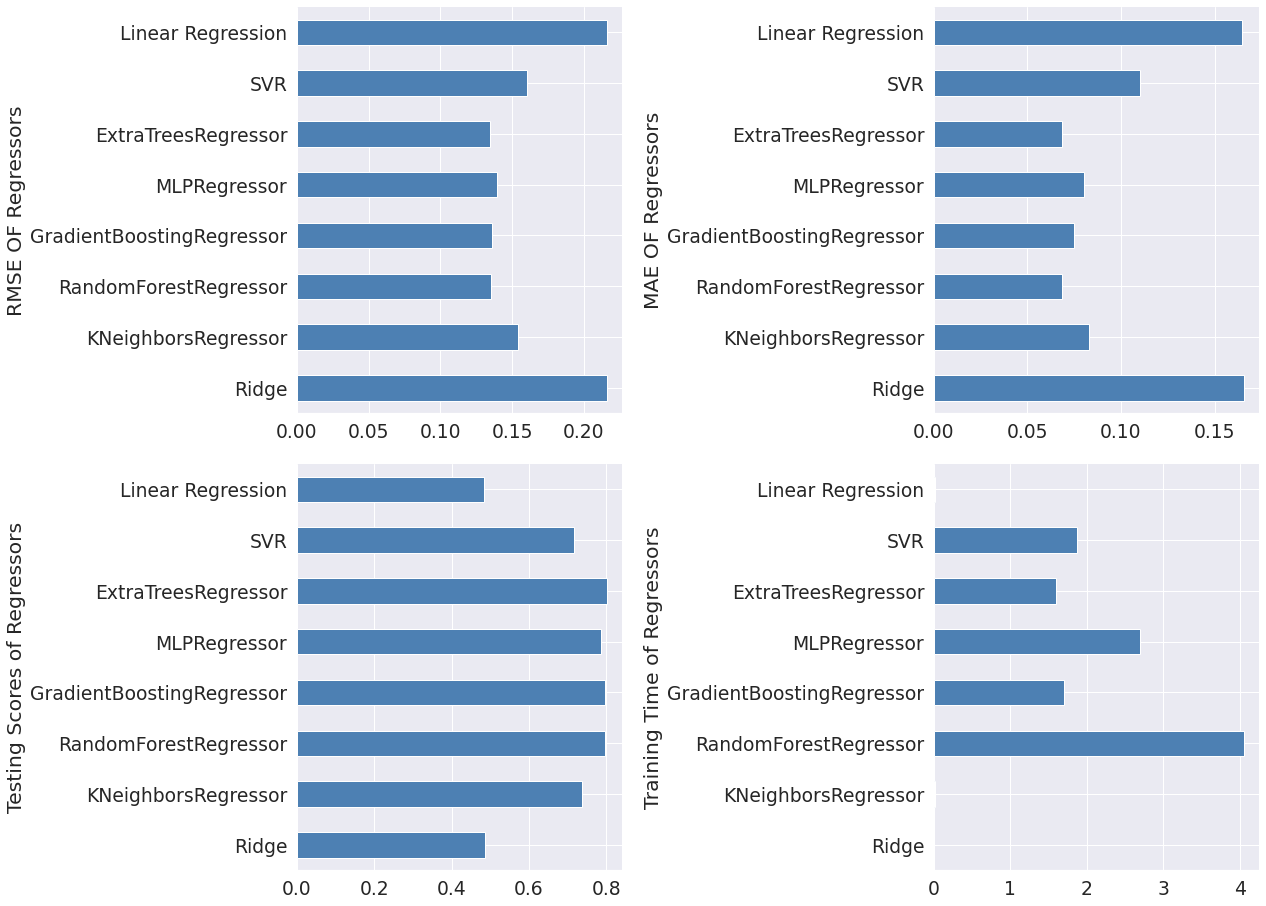

In [53]:
# Plot to compare thePerformance of Algorithms
sns.set_context("notebook", font_scale=1.7)
plt.figure(figsize=(18,13))

plt.subplot(2,2,1)
plt.ylabel("RMSE OF Regressors")
properties2["RMSE"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()


plt.subplot(2,2,2)
plt.ylabel("MAE OF Regressors")
properties2["MAE"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()

plt.subplot(2,2,3)
plt.ylabel("Testing Scores of Regressors")
properties2["Testing Scores"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()

plt.subplot(2,2,4)
plt.ylabel("Training Time of Regressors")
properties2["Training Times"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()

plt.savefig('/content/files_ML/S2.png')
plt.show()

# **SENARIO 3**

In [54]:
benchmark_model3 = LinearRegression() #object of class LinearRegression

start = time()
benchmark_model3.fit(X_train3, y_train3) #Fit object to training set
end = time()
y_pred3=benchmark_model3.predict(X_test3)
print("Classifier fitted in {:.2f} seconds".format(end-start))
print("Score on Training data : {:.2f}%".format(benchmark_model3.score(X_train3, y_train3) * 100))
print("Score on Testing data : {:.2f}%".format(benchmark_model3.score(X_test3, y_test3) * 100))

print("RMSE : {:.3f}".format(np.sqrt(np.mean((y_test3 - y_pred3)**2))))
mae = mean_absolute_error(y_test3, y_pred3)
print('MAE: %f' % mae)

Classifier fitted in 0.01 seconds
Score on Training data : 30.16%
Score on Testing data : 29.77%
RMSE : 0.253
MAE: 0.207594


In [55]:
# Function to execute each algorithm through the pipeline
def execute_pipeline():
    # Create the list of algorithms
    regressors = [
        Ridge,
        KNeighborsRegressor,
        RandomForestRegressor,
        GradientBoostingRegressor,
        MLPRegressor,
        ExtraTreesRegressor,
        SVR
            ]
    
    # To store the properties for each regressor
    props = []
    
    """
    Iterate thorugh the list of regressors,
    passing each thorugh the pipeline and
    storing its properites
    """ 
    for reg in regressors:
        properites = pipeline(reg, X_train3, y_train3, X_test3, y_test3)
        props.append(properites)
        
    return props

In [56]:
properties3 = get_properties()

properties3 = pd.concat(
    [properties3,
    pd.Series(
    {
        "Name": "Linear Regression",
        "RMSE": np.sqrt(mean_squared_error(y_test3, benchmark_model3.predict(X_test3))),
        "MAE": mean_absolute_error(y_test3, benchmark_model3.predict(X_test3)),
        "Training Scores": benchmark_model3.score(X_train3, y_train3),
        "Testing Scores" :benchmark_model3.score(X_test3, y_test3),
        "Training Times": end - start
        
    }
    ).to_frame().T.set_index(["Name"])]
)

properties3


,Training Times,Training Scores,Testing Scores,RMSE,MAE
Ridge,0.0097,0.3016,0.2977,0.2525,0.2076
KNeighborsRegressor,0.0116,0.9210,0.6881,0.1683,0.0918
RandomForestRegressor,4.5549,0.9844,0.7657,0.1459,0.0774
GradientBoostingRegressor,2.0642,0.8039,0.6944,0.1666,0.1059
MLPRegressor,2.4581,0.8820,0.7901,0.1381,0.0780
ExtraTreesRegressor,1.4466,1.0000,0.7713,0.1441,0.0774
SVR,1.8834,0.8264,0.7328,0.1558,0.1053
Linear Regression,0.0056,0.3016,0.2977,0.2525,0.2076


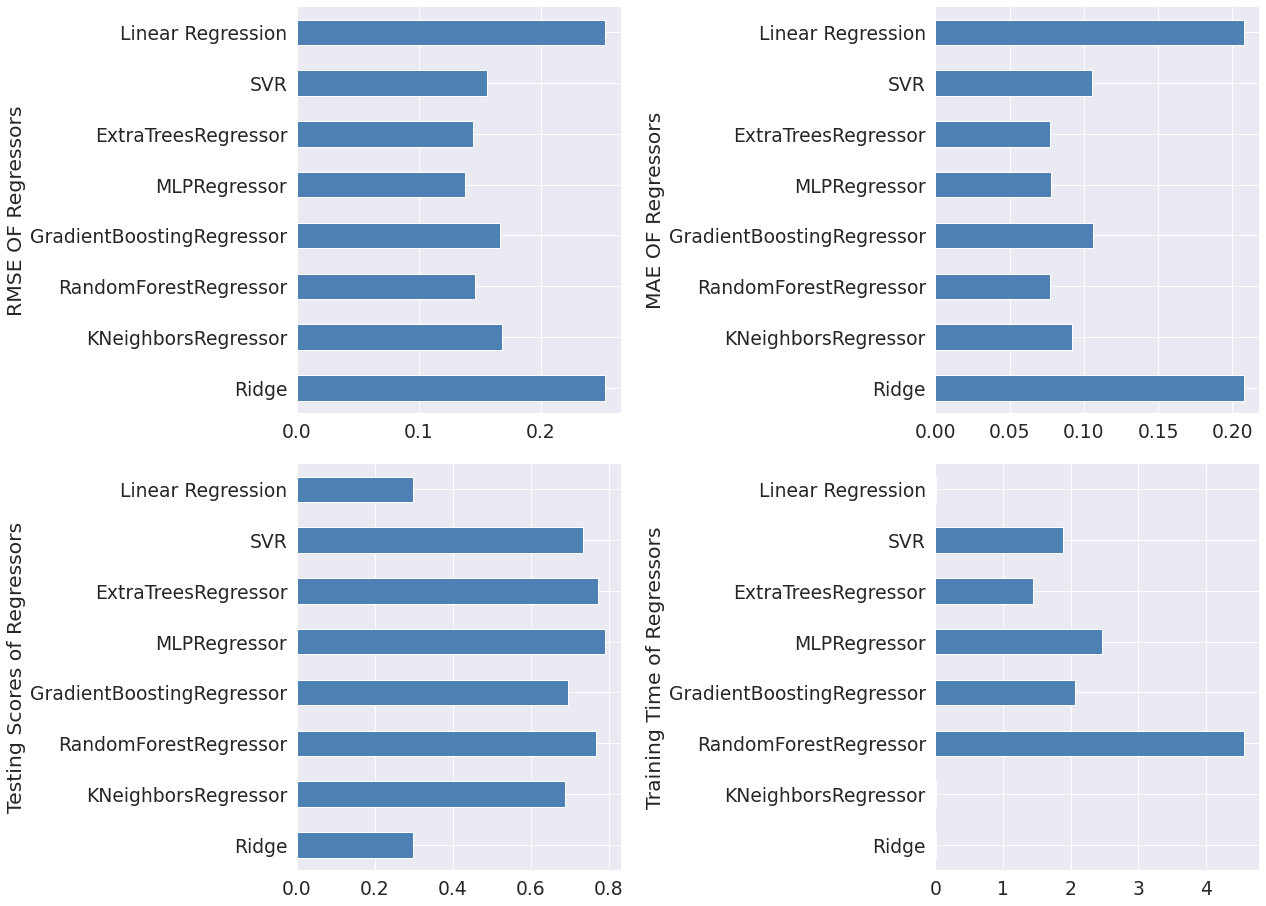

In [57]:
# Plot to compare thePerformance of Algorithms
sns.set_context("notebook", font_scale=1.7)
plt.figure(figsize=(18,13))

plt.subplot(2,2,1)
plt.ylabel("RMSE OF Regressors")
properties3["RMSE"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()


plt.subplot(2,2,2)
plt.ylabel("MAE OF Regressors")
properties3["MAE"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()

plt.subplot(2,2,3)
plt.ylabel("Testing Scores of Regressors")
properties3["Testing Scores"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()

plt.subplot(2,2,4)
plt.ylabel("Training Time of Regressors")
properties3["Training Times"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()

plt.savefig('/content/files_ML/S3.png')
plt.show()

# **Features Ranking**

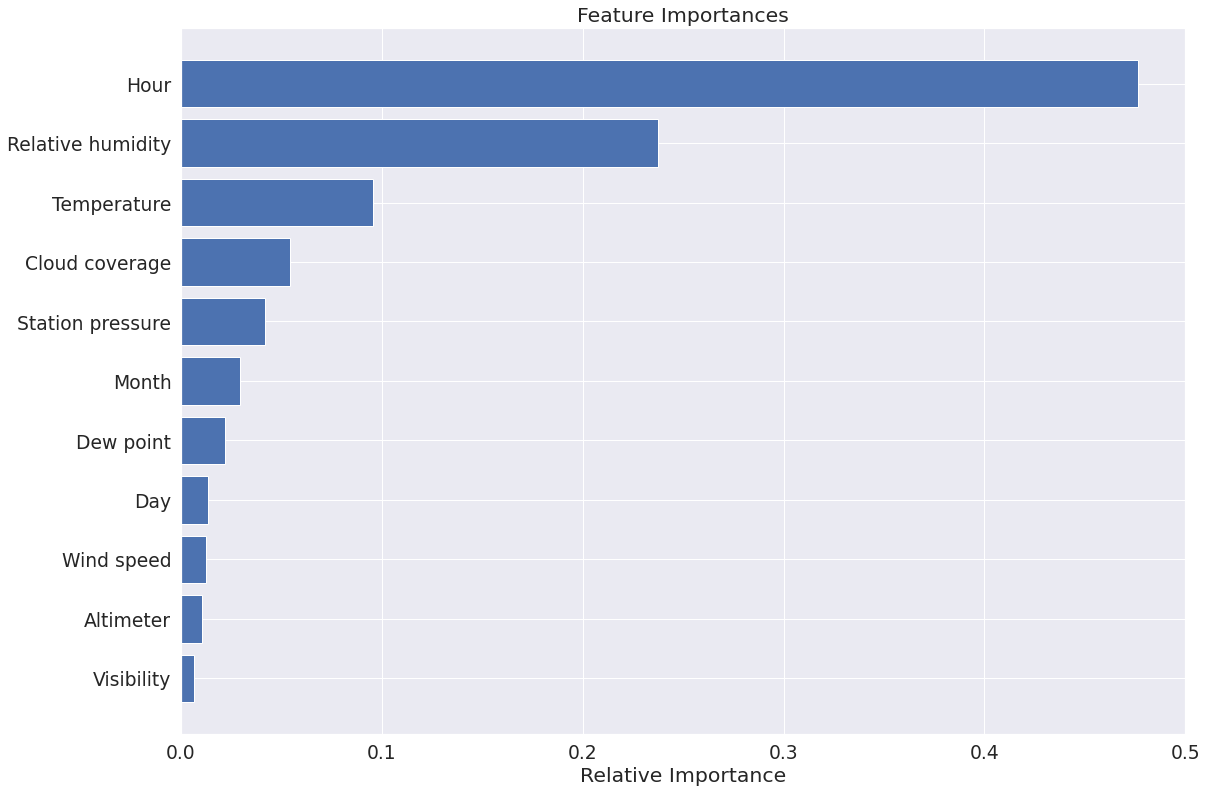

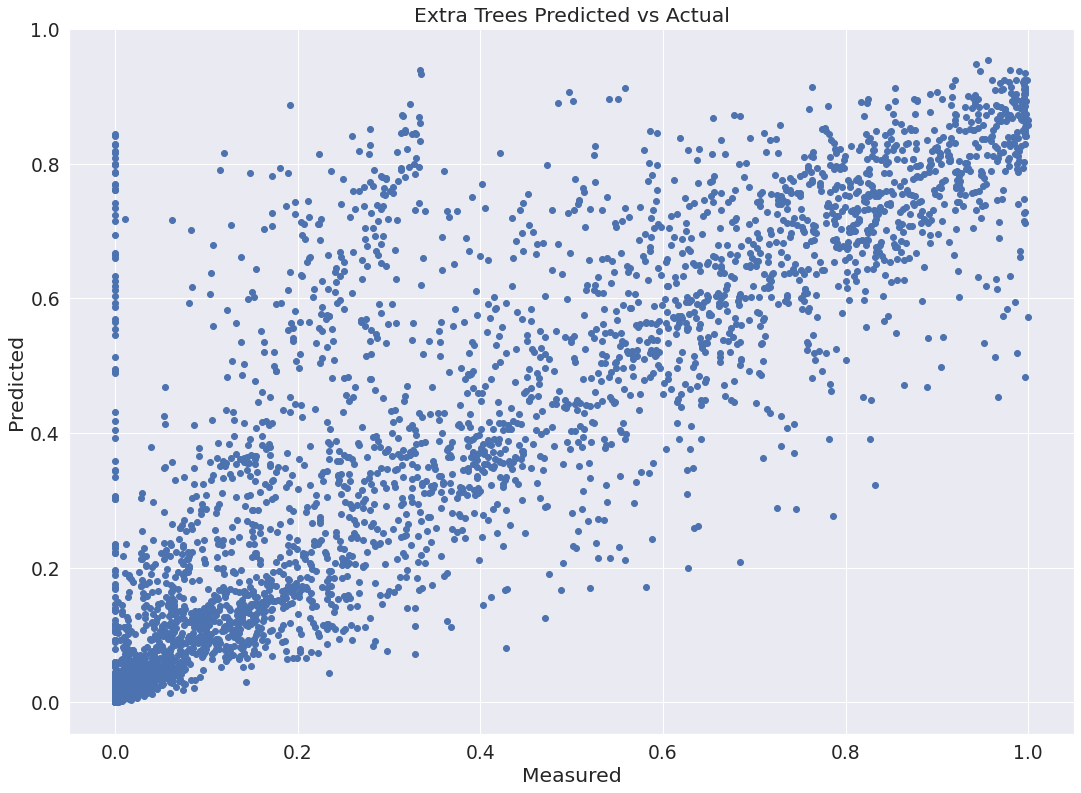

In [58]:
from sklearn.ensemble import ExtraTreesRegressor

names = X_train1.columns.values
extra_tree = ExtraTreesRegressor()

extra_tree.fit(X_train1, y_train1)

extratree_score = extra_tree.score(X_test1, y_test1)

extratree_pred = extra_tree.predict(X_test1)

features = X_train1.columns.values
importances = extra_tree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(18,13))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.savefig('/content/files_ML/FeatureImportances.png')
plt.show()

plt.figure(figsize=(18,13))
plt.scatter(y_test1, extratree_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Extra Trees Predicted vs Actual')
plt.show()


In [59]:
# Remove unrelated features
norm_df1 = np.array(norm_df) 
X_s3 = norm_df1[:, (0, 1, 3, 4, 5, 6, 7, 10, 11)]
y_s3 = y_s1

X_train4, X_test4, y_train4, y_test4 = train_test_split(X_s3, y_s3, test_size=0.30, random_state=0)

In [60]:
extra_tree = ExtraTreesRegressor(random_state=12345)

extra_tree.fit(X_train4, y_train4)

extratree_score = extra_tree.score(X_test4, y_test4)
print(extratree_score)

extratree_pred = extra_tree.predict(X_test4)

print("Root mean squared error: %.6f"
      % sqrt(mean_squared_error(y_test4, extratree_pred)))

print("Mean absolute error: %.6f"
      % mean_absolute_error(y_test4, extratree_pred))

0.9003659740952084
Root mean squared error: 0.090948
Mean absolute error: 0.046626


# **Hyper Parameter Tuning of Extra Trees Regressor**

In [61]:
from sklearn.model_selection import RandomizedSearchCV
# Initialize the best performing regressor
clf = ExtraTreesRegressor()

# Define the parameter subset
param_grid = {
    "n_estimators": [100, 200, 400, 500, 700, 750, 800, 850, 900, 1000, 1100, 1500],
    "max_features": ["auto", "sqrt", "log2"],
    "max_depth": [25, 30, 40, 50, 100, 150, 200, 250, 300]
}


grid_search = RandomizedSearchCV(clf, param_grid, n_iter=10, scoring="neg_mean_squared_error", cv=10, n_jobs=-1, verbose=2)
grid_search.fit(X_train4, y_train4)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=ExtraTreesRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [25, 30, 40, 50, 100, 150,
                                                      200, 250, 300],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [100, 200, 400, 500,
                                                         700, 750, 800, 850,
                                                         900, 1000, 1100,
                                                         1500]},
                   scoring='neg_mean_squared_error', verbose=2)

In [62]:
#Display best params
print("Parameters of best Regressor : {}".format(grid_search.best_params_))

Parameters of best Regressor : {'n_estimators': 850, 'max_features': 'log2', 'max_depth': 200}


In [63]:
best_model = grid_search.best_estimator_
print('R-squared: %.6f' % r2_score(y_test4, best_model.predict(X_test4)))
print('Root mean squared error: %.6f'% sqrt(mean_squared_error(y_test4, best_model.predict(X_test4))))
print('Mean absolute error: %.6f'% mean_absolute_error(y_test4, best_model.predict(X_test4)))
best_model = extra_tree.score(X_test4, y_test4)
print(extratree_score)

R-squared: 0.902914
Root mean squared error: 0.089778
Mean absolute error: 0.052148
0.9003659740952084


In [65]:
# Download all files
!zip -r /content/files_ML.zip /content/files_ML

from google.colab import files
files.download('files_ML.zip')

updating: content/files_ML/ (stored 0%)
updating: content/files_ML/10.png (deflated 16%)
updating: content/files_ML/S2.png (deflated 15%)
updating: content/files_ML/7.png (deflated 21%)
updating: content/files_ML/PCA.png (deflated 11%)
updating: content/files_ML/3.png (deflated 23%)
updating: content/files_ML/FeatureImportances.png (deflated 24%)
updating: content/files_ML/9.png (deflated 24%)
updating: content/files_ML/2.png (deflated 24%)
updating: content/files_ML/4.png (deflated 23%)
updating: content/files_ML/6.png (deflated 23%)
updating: content/files_ML/1.png (deflated 7%)
updating: content/files_ML/8.png (deflated 20%)
updating: content/files_ML/S1.png (deflated 14%)
updating: content/files_ML/11.png (deflated 14%)
updating: content/files_ML/5.png (deflated 25%)
updating: content/files_ML/S3.png (deflated 14%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>